In [1]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r'E:\STUDY\MÁY HỌC/online_shoppers_intention.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
print(df['Revenue'].value_counts())

Revenue
False    10422
True      1908
Name: count, dtype: int64


In [5]:
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [6]:
describe_df=df.describe()

In [8]:
describe_df.to_csv('E:\STUDY\MÁY HỌC/describe_output.csv', encoding='utf-8')

In [9]:
def remove_duplicates(df):
    duplicated_count = df.duplicated().sum()

    if duplicated_count == 0:
        return "Không có dữ liệu trùng lặp"
    else:
        df.drop_duplicates(inplace=True)
        return f"Đã xóa {duplicated_count} bản ghi trùng lặp"


def remove_null_values(df):
    null_count = df.isnull().sum().sum()

    if null_count == 0:
        return "Không có dữ liệu có giá trị null"
    else:
        df.dropna(inplace=True)
        return f"Đã xóa {null_count} giá trị null"

msg_dup = remove_duplicates(df)
print(msg_dup)

msg_null = remove_null_values(df)
print(msg_null)

Đã xóa 125 bản ghi trùng lặp
Không có dữ liệu có giá trị null


In [10]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

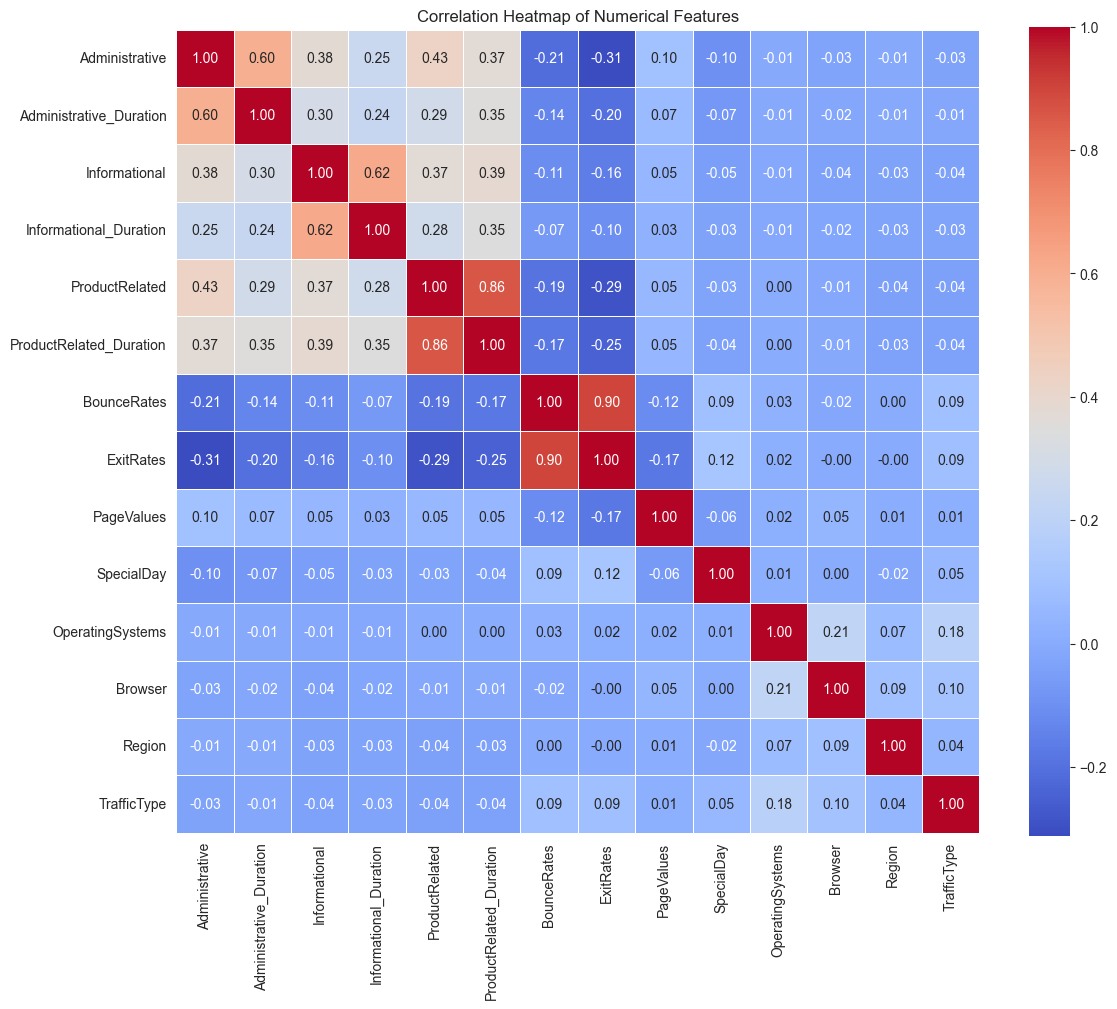

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

C:\Users\Xuan Dongg\AppData\Local\Temp\ipykernel_21304\259347293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=df, palette='pastel')


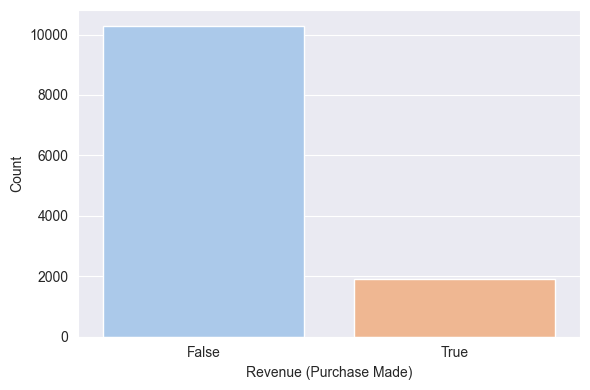

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=df, palette='pastel')
plt.xlabel("Revenue (Purchase Made)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

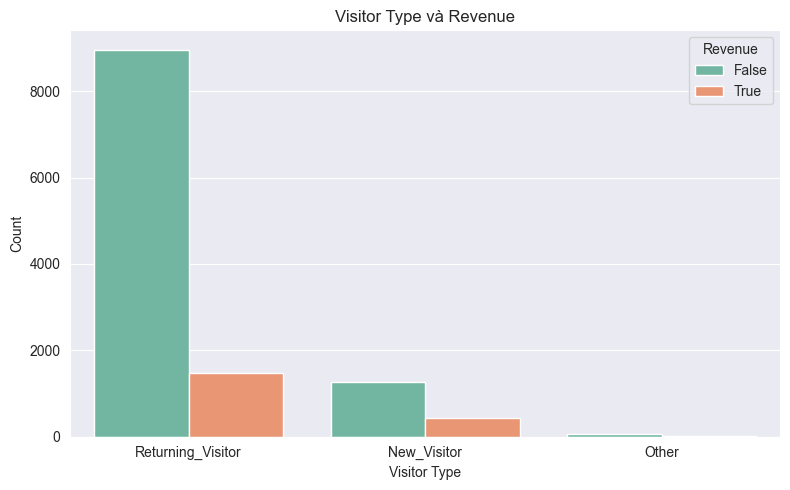

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='VisitorType', hue='Revenue', data=df, palette='Set2')
plt.title("Visitor Type và Revenue")
plt.xlabel("Visitor Type")
plt.ylabel("Count")
plt.legend(title="Revenue")
plt.tight_layout()
plt.show()


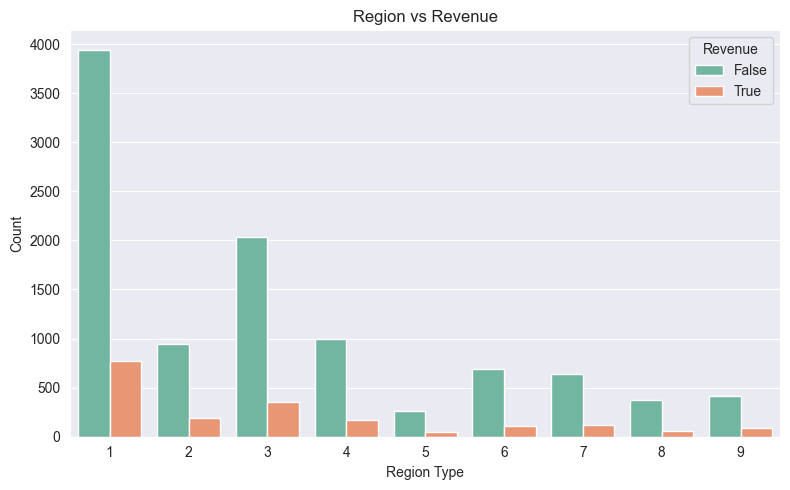

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', hue='Revenue', data=df, palette='Set2')
plt.title("Region vs Revenue")
plt.xlabel("Region Type")
plt.ylabel("Count")
plt.legend(title="Revenue")
plt.tight_layout()
plt.show()


In [16]:
df['Revenue'] = df['Revenue'].map({True: 1, False: 0})

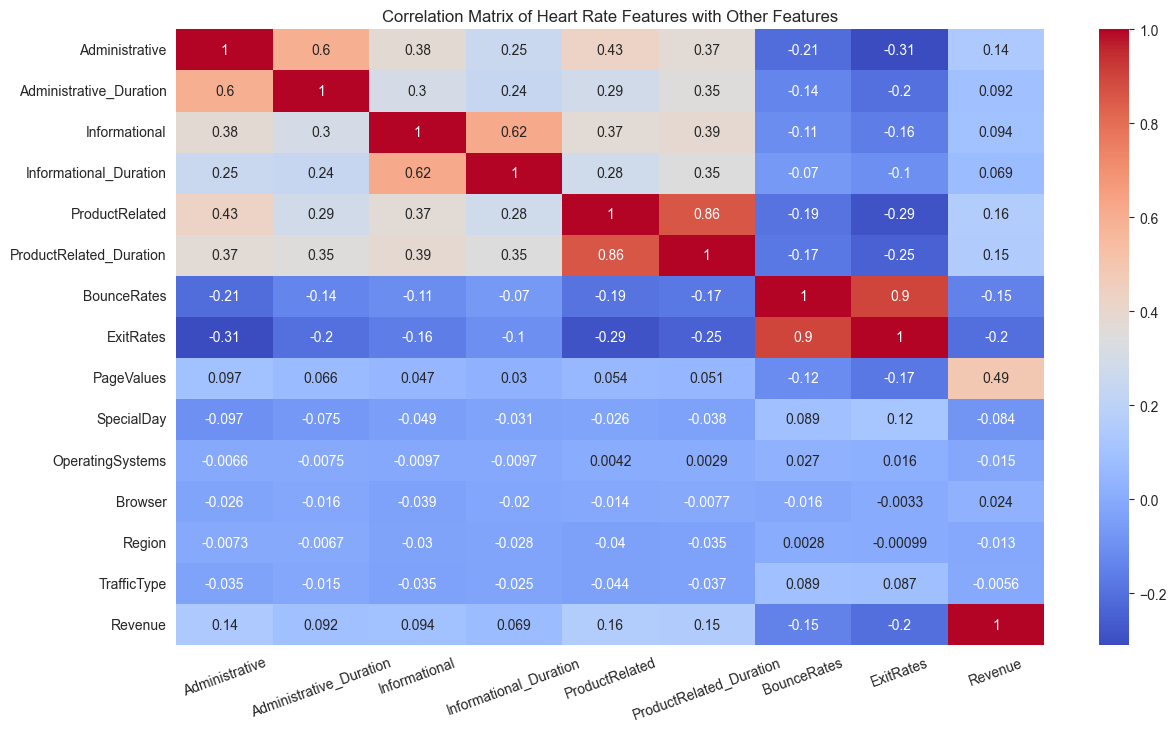

In [17]:
gym_qh = df.select_dtypes(include=['int64', 'float64'])

# Tính toán ma trận tương quan
matran_cor = gym_qh.corr()
# Vẽ heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(matran_cor[['Administrative', 'Administrative_Duration',"Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates", 'Revenue']], annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Heart Rate Features with Other Features")
plt.xticks(rotation=20)
plt.show()